# SVG(Scalable Vector Graphics)
- can display graphics made in Inkscape, Adobe Illustrator, or generated by a program
- '%%SVG' is 'magic command' - tells the notebook to intepret cell contents as SVG graphics 
- below created in Inkscape

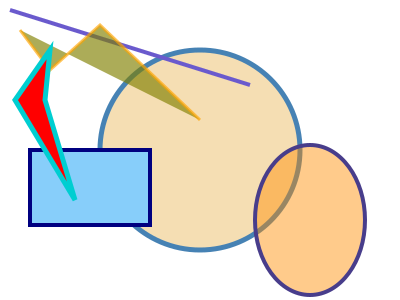

In [2]:
%%SVG

<svg width="400" height="300">
    <circle  cx="200" cy="150" r="100"
        style="fill:Wheat; stroke:SteelBlue; stroke-width:5;"/>
    <line x1="10" y1="10" x2="250" y2="85"
        style="stroke:SlateBlue; stroke-width:4"/>
    <polyline points="20,30 50,70 100,25 200,120"
        style="stroke:orange; stroke-width:3;
               fill:olive; opacity:0.65;"/>
    <rect x="30" y="150" width="120" height="75"
        style="stroke:Navy; stroke-width:4; fill:LightSkyBlue;"/>
    <ellipse cx="310" cy="220" rx="55" ry="75"
        style="stroke:DarkSlateBlue; stroke-width:4;
               fill:DarkOrange; fill-opacity:0.45;"/>
    <polygon points="50,50 15,100 75,200 45,100"
        style="stroke:DarkTurquoise; stroke-width:5; fill:Red;"/>
</svg>



# Samples
- you might not be impressed with my "abstract" above, here's some nicer examples
    - [dog](https://inkscape.org/en/~luizrezende/★the-great-friend)
    - [inkdrop](https://inkscape.org/en/~artelnjeru01/★about-092-2-good)
    - [animated koi](https://inkscape.org/en/~IK/★animation-inkscape-koi-carp)

# svgwrite module
- module that builds SVG strings from API calls
- [doc](https://svgwrite.readthedocs.io/en/master/overview.html)

In [12]:
# code that makes memory visualization

import svgwrite
import collections

nobinding = "nobinding"

def binding(var):
    try:
        return eval(var)
    except NameError:
        return nobinding
    
class listis:
    def __init__(self):
        self.lis = []
    def get(self, key):
        for k,v in self.lis:
            if key is k:
                return v
    def put(self, key, val):
        new = True
        for pair in self.lis:
            if pair[0] is key:
                pair[1].append(val)
                new = False
        if new:
            self.lis.append([key, [val]])
    def keys(self):
        return [k for k,v in self.lis]

class memgraph:
    def __init__(self, vars):
        self.vars = sorted(vars)
        
    def _repr_svg_(self):
        "if this method exists, the notebook will call it and display the SVG the method returns"
        d = svgwrite.Drawing(size=(800,150))

        left = 100
        right = 260
        dy = 30
        vv = listis()
        ais = listis()
        
        for var in self.vars:
            val = binding(var)
            if val != nobinding:
                vv.put(val,var)
                ais.put(val, val)

        vals = ais.keys()
        vary = dict()
        
        y = dy
        d.add(d.text("Variables", insert=(left, y), text_anchor="end", fill='blue'))
        y += dy
        
        for var in self.vars:
            d.add(d.text(var, insert=(left, y), text_anchor="end", fill='black'))
            vary[var] = y
            y += dy

        y = dy
        d.add(d.text("Objects(in the Heap)", insert=(right, y), fill='blue'))
        y += dy
        
        for val in vals:
            d.add(d.text(str(val), insert=(right, y), fill='black'))

            for var in vv.get(val):
                ly = vary[var]
                d.add(d.line((left, ly ), (right, y),  stroke=svgwrite.rgb(90, 10, 16, '%')))
            y += dy
            
        return d.tostring()

    def svg(self):
        return self._repr_svg_()


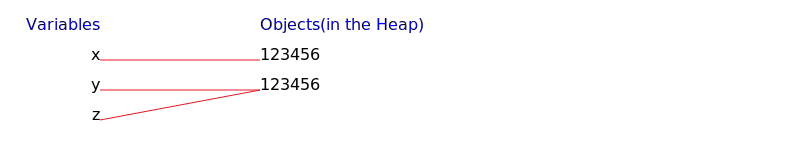

In [14]:
x = 123456
y = 123456
z = y

# graph memory

mg = memgraph(['x', 'y','z'])
mg

In [15]:
# SVG string generated

mg.svg()

'<svg baseProfile="full" height="150" version="1.1" width="800" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><text fill="blue" text-anchor="end" x="100" y="30">Variables</text><text fill="black" text-anchor="end" x="100" y="60">x</text><text fill="black" text-anchor="end" x="100" y="90">y</text><text fill="black" text-anchor="end" x="100" y="120">z</text><text fill="blue" x="260" y="30">Objects(in the Heap)</text><text fill="black" x="260" y="60">123456</text><line stroke="rgb(90%,10%,16%)" x1="100" x2="260" y1="60" y2="60" /><text fill="black" x="260" y="90">123456</text><line stroke="rgb(90%,10%,16%)" x1="100" x2="260" y1="90" y2="90" /><line stroke="rgb(90%,10%,16%)" x1="100" x2="260" y1="120" y2="90" /></svg>'